In [63]:
# Importing correct packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Machine Learning Libraries
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Figures
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [64]:
# Get Dataframe
df = pd.read_csv("/Users/matthewbuttlerives/Desktop/Data Folder/Period_1_Game_Stats_Final_ModelReady(April-9th-2022-A).csv")

In [66]:
print(df.shape)
df = df.iloc[: , 1:]
df.head(5)

(19893, 22)


,won,Shots,Shots_Against,Goals,Goals_Against,Takeaways,Takeaways_Against,Hits,Hits_Against,Blocked Shots,Blocked Shots Against,Giveaways,Giveaways_Against,Missed Shots,Missed Shots_Against,Penalities,Penalities_Against,#Won Faceoffs,#Lost Faceoffs,HoA_away,HoA_home
0,0,8.0,8.0,0.0,3.0,1.0,3.0,14.0,5.0,3.0,3.0,6.0,7.0,4.0,0.0,1.0,1.0,10.0,12.0,1,0
1,1,8.0,8.0,3.0,0.0,3.0,1.0,5.0,14.0,3.0,3.0,7.0,6.0,0.0,4.0,1.0,1.0,12.0,10.0,0,1
2,1,11.0,12.0,0.0,1.0,0.0,2.0,4.0,4.0,6.0,8.0,2.0,0.0,6.0,3.0,1.0,3.0,11.0,9.0,1,0
3,0,12.0,11.0,1.0,0.0,2.0,0.0,4.0,4.0,8.0,6.0,0.0,2.0,3.0,6.0,3.0,1.0,9.0,11.0,0,1
4,1,9.0,8.0,0.0,1.0,3.0,2.0,4.0,5.0,7.0,1.0,7.0,5.0,3.0,8.0,2.0,1.0,7.0,11.0,1,0


In [67]:
# split data into X and y
y = df.pop('won')
X = df
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [68]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.587872	valid_0's binary_logloss: 0.603663
[40]	training's binary_logloss: 0.564537	valid_0's binary_logloss: 0.600542
[60]	training's binary_logloss: 0.545697	valid_0's binary_logloss: 0.601237
[80]	training's binary_logloss: 0.528572	valid_0's binary_logloss: 0.602332
[100]	training's binary_logloss: 0.512748	valid_0's binary_logloss: 0.604488


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [69]:
#from sklearn.model_selection import GridSearchCV
#gs_sample_weight = GridSearchCV(estimator=model, 
#                                param_grid={'learning_rate':[0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01],'max_depth':[-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10]},
 #                               scoring='roc_auc',
 #                               cv=5,
  #                              refit=True,
    #                            verbose=True)
#fit_params={"early_stopping_rounds":30, 
 #           "eval_metric" : 'auc', 
 #           "eval_set" : [(X_test,y_test)],
 #           'eval_names': ['valid'],
 #           'verbose': 100,
  #          'categorical_feature': 'auto'}

In [70]:
#gs_sample_weight.fit(X_train, y_train, **fit_params)
#print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

In [71]:
# Best score reached: 0.7365432036139926 with params: {'learning_rate': 0.03, 'max_depth': 2} 

In [72]:
model = lgb.LGBMClassifier(learning_rate=0.03,max_depth=-1,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.626283	valid_0's binary_logloss: 0.631156
[40]	training's binary_logloss: 0.601043	valid_0's binary_logloss: 0.610597
[60]	training's binary_logloss: 0.588184	valid_0's binary_logloss: 0.603903
[80]	training's binary_logloss: 0.579522	valid_0's binary_logloss: 0.601196
[100]	training's binary_logloss: 0.571912	valid_0's binary_logloss: 0.600304


LGBMClassifier(learning_rate=0.03, random_state=42)

In [73]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.7052
Testing accuracy 0.6644


In [74]:
# Interestingly, slightly better accuracy
# make predictions for test data
from sklearn.metrics import precision_score, recall_score
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision score: ', (precision_score(y_test, predictions)))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy: 66.44%
Precision score:  0.6634294385432473
Recall score:  0.6664634146341464


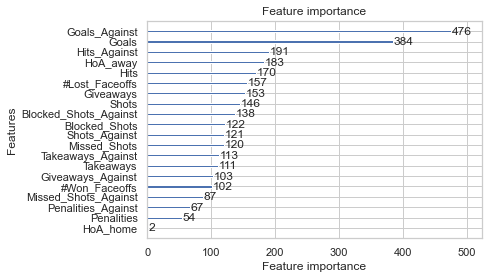

In [75]:
# plot feature importance
import lightgbm
from matplotlib import pyplot
lightgbm.plot_importance(model)
pyplot.show()

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

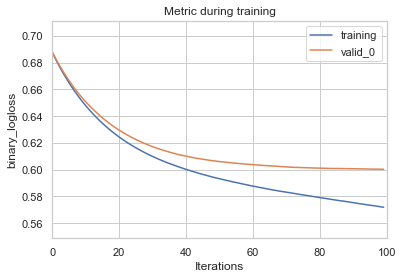

In [76]:
lgb.plot_metric(model)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


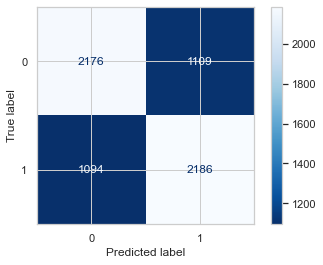

In [77]:
metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r')

In [78]:
print(metrics.classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      3285
           1       0.66      0.67      0.66      3280

    accuracy                           0.66      6565
   macro avg       0.66      0.66      0.66      6565
weighted avg       0.66      0.66      0.66      6565



# API SportsRadar Request

## Today's Games

In [79]:
from datetime import date
import re
from datetime import datetime,timedelta
import requests
import json

today = date.today()

# dd/mm/YY
Day = today.strftime("%d")
Month = today.strftime("%m")
Year = today.strftime("%Y")
today = date.today()
print("Today's date:", today)
# Get API info
response = requests.get(("https://api.sportradar.us/nhl/trial/v7/en/games/{Year}/{Month}/{Day}/schedule.json?api_key=sa8b3wuwy549qwy6jw6srsgv").format(Day=Day, Month = Month, Year = Year))

# Set response as json
x = response.json()
# Print API info
def getrs(obj):
    Todays_Schedule = []
    Todays_Schedule = pd.DataFrame([],columns = ["Game ID","Home Team",'Home Team ID',"Away Team","Away Team ID","Start Time"])
    q = len(obj["games"])
    for i in range(q):
            GID = obj["games"][i]["id"]
            H = obj['games'][i]['home']['name']
            Hid = obj['games'][i]['home']['id']
            A = obj['games'][i]['away']['name']
            Aid = obj['games'][i]['away']['id']
            PD = obj['games'][i]['scheduled']
            PD = re.search('T(.+?)Z',PD)
            if PD:
                found = PD.group(1)
            format = "%H:%M:%S"
            d = datetime.strptime(found,format) - timedelta(hours=4)
            d = d.strftime("%H:%M:%S")
            PD = d
            temp_df = [GID,H,Hid,A,Aid,PD]
            a_series = pd.Series(temp_df,index = Todays_Schedule.columns)
            Todays_Schedule = Todays_Schedule.append(a_series, ignore_index=True)
    return Todays_Schedule
data=getrs(x)
data.head(20)

Today's date: 2022-04-10


,Game ID,Home Team,Home Team ID,Away Team,Away Team ID,Start Time
0,4ee43175-97ab-41f2-abf0-b540cc3b6f81,Washington Capitals,4417eede-0f24-11e2-8525-18a905767e44,Boston Bruins,4416ba1a-0f24-11e2-8525-18a905767e44,13:30:00
1,2018b08a-232e-4c60-94e6-de68693b4cc4,Pittsburgh Penguins,4417b7d7-0f24-11e2-8525-18a905767e44,Nashville Predators,441643b7-0f24-11e2-8525-18a905767e44,16:00:00
2,3d652a4b-e299-41ed-ad17-7673689744d8,Minnesota Wild,4416091c-0f24-11e2-8525-18a905767e44,Los Angeles Kings,44151f7a-0f24-11e2-8525-18a905767e44,17:00:00
3,f6046abe-18bd-45a9-98b5-deee79851770,Tampa Bay Lightning,4417d3cb-0f24-11e2-8525-18a905767e44,Buffalo Sabres,4416d559-0f24-11e2-8525-18a905767e44,17:00:00
4,bbebd1f5-0296-4b03-b0aa-7c2c97c1244d,Carolina Hurricanes,44182a9d-0f24-11e2-8525-18a905767e44,Anaheim Ducks,441862de-0f24-11e2-8525-18a905767e44,18:00:00
5,e9d74ec1-a79e-461f-9b1b-0af72138bde1,Chicago Blackhawks,4416272f-0f24-11e2-8525-18a905767e44,Dallas Stars,44157522-0f24-11e2-8525-18a905767e44,19:00:00
6,726c2d4b-92fd-4d1a-99a0-472f09eb7f99,Ottawa Senators,4416f5e2-0f24-11e2-8525-18a905767e44,Winnipeg Jets,44180e55-0f24-11e2-8525-18a905767e44,19:30:00


# Home Team 1st Period Stats

In [116]:
def Game_Home_Team_Stats(game_id,home_team_id,game_time):
    ts = 0
    tsa = 0
    go = 0
    goa = 0
    t = 0
    ta = 0
    h = 0
    ha = 0
    bs = 0
    bsa = 0
    gi = 0
    gia = 0
    ms = 0
    msa = 0
    p = 0
    pa = 0
    tfw = 0
    tfl = 0
    away = 0
    home = 0
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    if current_time < game_time:
        pass
    else:
        response = requests.get(("https://api.sportradar.us/nhl/trial/v7/en/games/{obj}/pbp.json?api_key=sa8b3wuwy549qwy6jw6srsgv").format(obj = game_id))
        x = response.json()
        y = len(x['periods'][0]['events'])
        htc = x['home']['id']
        Team_Name = x['home']['name']
        if htc == home_team_id:
            home = 1
        else:
            away = 1
        for i in range(y):
            j = x['periods'][0]['events'][i]['event_type']
            if j == 'faceoff':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                        tfw = tfw + 1
                else:
                        tfl = tfl + 1
            elif j == 'goal':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                        go = go + 1
                else:
                    goa = goa + 1
            elif j == 'penalty':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                    p = p + 1
                else:
                    pa = pa + 1
            elif j == 'shotmissed' and 'blocked' in x['periods'][0]['events'][i]['description']:
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                        bs = bs + 1
                else:
                        bsa = bsa + 1
            elif j == 'shotmissed' and 'missed' in x['periods'][0]['events'][i]['description']:
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                        ms = ms + 1
                else:
                        msa = msa + 1
            elif j == 'giveaway':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                    gi = gi + 1
                else:
                    gia = gia + 1
            elif j == 'hit':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                    h = h + 1
                else:
                    ha = ha + 1
            elif j == 'takeaway':
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                    t = t + 1
                else:
                    ta = ta + 1
            elif 'shot' in j:
                team_id = x['periods'][0]['events'][i]['attribution']['id']
                if team_id == home_team_id:
                    ts = ts + 1
                else:
                    tsa = tsa + 1
            else:
                pass
            d = {"Team_Name":[Team_Name],"shots": [ts], "shots_against": [tsa],"goals":[go],"goals_against":[goa],"takeaways":[t],"takeaways_against":[ta],"hits":[h],"hits_against":[ha],"blockedShots":[bs],"blockedShots_against":[bsa],"giveaways":[gi],"giveaways_against":[gia],"missedShots":[ms],"missedShots_against":[msa],"penalties":[p],"penalties_against":[pa],"#Won Faceoffs":[tfw],"#Lost Faceoffs":[tfl],'HoA_away':[away],'HoA_home':[home]}
            Home_Team_Stats = pd.DataFrame(d)
        return Home_Team_Stats

def get_game_stats(obj):
    c = ["Team_Name","shots", "shots_against","goals","goals_against","takeaways","takeaways_against","hits","hits_against","blockedShots","blockedShots_against","giveaways","giveaways_against","missedShots","missedShots_against","penalties","penalties_against","#Won Faceoffs","#Lost Faceoffs",'HoA_away','HoA_home']
    Tonights_games_stats = pd.DataFrame([],columns = c)
    r = len(obj['Game ID'])
    for i in range(r):
        game_id = obj['Game ID'][i]
        home_team_id = obj['Home Team ID'][i]
        game_start = obj['Start Time'][i]
        temp_df = Game_Home_Team_Stats(game_id,home_team_id,game_start)
        Tonights_games_stats = Tonights_games_stats.append(temp_df,ignore_index = True)
    return Tonights_games_stats

def tonights_bets(obj):
    m = len(obj)
    for i in range(m):
        Game_y_pred = model.predict(X_Game_test)
        prediction = [round(value) for value in Game_y_pred]
        print(prediction)
        probability = model.predict_proba(X_Game_test)
        print(probability)
tonights_data=get_game_stats(data)

# Generate Predictions
m = len(tonights_data)
y = tonights_data.pop('Team_Name')
for i in range(m):
    x_value = tonights_data.iloc[i]
    test = np.array([x_value])
    x_value = test.reshape(1, -1)
    Game_y_pred = model.predict(x_value)
    prediction = [round(value) for value in Game_y_pred]
    probability = model.predict_proba(x_value)
    if prediction[0] != 1:
        print("The "+y[i]+" are projected to lose.")
        print("Current odds are "+str(round((probability[0][0])*100,2))+"%"+" to lose and only "+str(round((probability[0][1])*100,2))+"%"+" to win."+'\n')
    else:
        print("The "+y[i]+" are projected to win.")
        print("Current odds are "+str(round((probability[0][1])*100,2))+"%"+" to win and "+str(round((probability[0][0])*100,2))+"%"+ " to lose."+'\n')
tonights_data.head(20)

The Capitals are projected to win.
Current odds are 53.55% to win and 46.45% to lose.

The Penguins are projected to win.
Current odds are 56.49% to win and 43.51% to lose.

The Wild are projected to lose.
Current odds are 73.89% to lose and only 26.11% to win.

The Lightning are projected to win.
Current odds are 83.86% to win and 16.14% to lose.

The Hurricanes are projected to win.
Current odds are 79.73% to win and 20.27% to lose.

The Blackhawks are projected to win.
Current odds are 61.04% to win and 38.96% to lose.

The Senators are projected to win.
Current odds are 54.21% to win and 45.79% to lose.



,shots,shots_against,goals,goals_against,takeaways,takeaways_against,hits,hits_against,blockedShots,blockedShots_against,giveaways,giveaways_against,missedShots,missedShots_against,penalties,penalties_against,#Won Faceoffs,#Lost Faceoffs,HoA_away,HoA_home
0,7,8,0,0,3,2,22,17,4,7,4,3,2,8,2,0,5,11,0,1
1,2,10,1,1,4,1,11,18,5,5,3,1,6,4,0,0,9,9,0,1
2,8,8,2,3,1,4,6,7,6,4,2,0,2,2,1,2,12,10,0,1
3,7,9,2,0,5,2,9,10,4,1,1,5,4,7,0,0,9,8,0,1
4,13,9,3,2,6,5,5,6,1,4,4,3,9,1,2,2,9,10,0,1
5,11,8,2,2,3,3,9,10,3,2,4,4,3,2,2,2,9,7,0,1
6,11,4,1,1,3,0,8,6,1,2,5,4,1,2,2,1,13,10,0,1


In [117]:
tonights_data.insert(0, "won", [1,1,1,1,1,0,0], True)

In [119]:
# Get Dataframe
df = pd.read_csv("/Users/matthewbuttlerives/Desktop/Data Folder/Period_1_Game_Stats_Final_ModelReady(April-9th-2022-A).csv")
# Create Update Dataframe
df = pd.concat([df,tonights_data.rename(columns={'shots':'Shots','shots_against':'Shots_Against','goals':"Goals","goals_against":"Goals_Against","takeaways":"Takeaways","takeaways_against":"Takeaways_Against","hits":"Hits","hits_against":"Hits_Against","blockedShots":"Blocked Shots","blockedShots_against":"Blocked Shots Against","giveaways":"Giveaways","giveaways_against":"Giveaways_Against","missedShots":"Missed Shots","missedShots_against":"Missed Shots_Against","penalties":"Penalities","penalties_against":"Penalities_Against"})], ignore_index=True)

In [120]:
df.to_csv('Period_1_Game_Stats_Final_ModelReady(April-10th-2022).csv')